# Loading packages & data

In [1]:
# Import packages
import pandas as pd

# Remove column display limit for pandas
pd.set_option('display.max_columns', None)

# Ignore pandas warning
pd.set_option('mode.chained_assignment', None)

In [2]:
# Load CSVs from Google Drive
# Try to avoid having to re-run this because it takes a while
crime_2020_2024 = '1V9pJ1fghA9FIYP1PgR_lfx-3lAMJPxWo'
crime_2010_2019 = '1HfsVnsIApb0wC05yQevKZTe_G71qmZ5O'

url_2010=f'https://drive.usercontent.google.com/download?id={crime_2010_2019}&export=download&authuser=0&confirm=t'
url_2020=f'https://drive.usercontent.google.com/download?id={crime_2020_2024}&export=download&authuser=0&confirm=t'

df_2020 = pd.read_csv(url_2020, on_bad_lines='skip')
df_2010 = pd.read_csv(url_2010, on_bad_lines='skip')

In [45]:
# 'AREA' column has a stray space in one DF, making it not concatenate properly
df_2010 = df_2010.rename(columns={'AREA ': 'AREA'})

# Concatenate dataframes
df = pd.concat([df_2010, df_2020])
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,0,M,H,103.0,ALLEY,NaN,NaN,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,47,F,W,101.0,STREET,102.0,HAND GUN,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",0400,47,F,H,103.0,ALLEY,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


# Cleaning data
### Dropping columns

In [46]:
# Drop columns that are useless for analysis, ETL, and feature engineering
cols_to_drop = ['Cross Street', 'Part 1-2', 'LOCATION', 'Rpt Dist No', 'DR_NO']
df = df.drop(columns=cols_to_drop)

# Review new columns
df.columns

Index(['Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Crm Cd',
       'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent',
       'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status',
       'Status Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LAT',
       'LON'],
      dtype='object')

### Renaming columns

In [47]:
# Rename columns to one format (camel case)
df = df.rename(columns={
    'Date Rptd': 'reportDate',
    'DATE OCC': 'crimeDate',
    'TIME OCC': 'crimeTime',
    'AREA': 'area',
    'AREA NAME': 'areaName',
    'Crm Cd': 'crimeCode',
    'Crm Cd Desc': 'crimeCodeDescription',
    'Mocodes': 'moCodes',
    'Vict Age': 'victimAge',
    'Vict Sex': 'victimSex',
    'Vict Descent': 'victimDescent',
    'Premis Cd': 'siteCode',
    'Premis Desc': 'siteDescription',
    'Weapon Used Cd': 'weaponCode',
    'Weapon Desc': 'weaponDescription',
    'Status': 'status',
    'Status Desc': 'statusDescription',
    'Crm Cd 1': 'crimeCode1',
    'Crm Cd 2': 'crimeCode2',
    'Crm Cd 3': 'crimeCode3',
    'Crm Cd 4': 'crimeCode4',
    'LAT': 'lat',
    'LON': 'lon'
})

### Null values

In [48]:
# Address null values
df['moCodes'] = df['moCodes'].fillna('0') # no code
df['victimSex'] = df['victimSex'].fillna('x') # x is other/unknown
df['victimDescent'] = df['victimDescent'].fillna('x') # x is other/unknown
df['siteCode'] = df['siteCode'].fillna(0) # no code
df['siteDescription'] = df['siteDescription'].fillna('other') # other/unknown site
df['weaponCode'] = df['weaponCode'].fillna(0) # no code
df['weaponDescription'] = df['weaponDescription'].fillna('unknown/none') # weapon either unknown or wasn't involved
df[['crimeCode1','crimeCode2','crimeCode3','crimeCode4']] = df[['crimeCode1','crimeCode2','crimeCode3','crimeCode4']].fillna(0) # no code

# status has 4 nulls, and is our target column, so it makes more sense to drop these than to fill them
df = df.dropna(subset='status')

# Verify no more nulls 
df.isna().sum()

reportDate              0
crimeDate               0
crimeTime               0
area                    0
areaName                0
crimeCode               0
crimeCodeDescription    0
moCodes                 0
victimAge               0
victimSex               0
victimDescent           0
siteCode                0
siteDescription         0
weaponCode              0
weaponDescription       0
status                  0
statusDescription       0
crimeCode1              0
crimeCode2              0
crimeCode3              0
crimeCode4              0
lat                     0
lon                     0
dtype: int64

### Reformatting data

In [49]:
# Convert all string values to lower case
df = df.apply(lambda col: col.str.lower() if col.dtype == 'object' else col)

# Convert codes to strings
df[['crimeCode', 'siteCode', 'weaponCode', 'crimeCode1', 'crimeCode2', 'crimeCode3', 'crimeCode4']] = df[['crimeCode', 'siteCode', 'weaponCode', 'crimeCode1', 'crimeCode2', 'crimeCode3', 'crimeCode4']].astype(int).astype(str)

# Inspect results
df.head()

,reportDate,crimeDate,crimeTime,area,areaName,crimeCode,crimeCodeDescription,moCodes,victimAge,victimSex,victimDescent,siteCode,siteDescription,weaponCode,weaponDescription,status,statusDescription,crimeCode1,crimeCode2,crimeCode3,crimeCode4,lat,lon
0,02/20/2010 12:00:00 am,02/20/2010 12:00:00 am,1350,13,newton,900,violation of court order,0913 1814 2000,48,m,h,501,single family dwelling,0,unknown/none,aa,adult arrest,900,0,0,0,33.9825,-118.2695
1,09/13/2010 12:00:00 am,09/12/2010 12:00:00 am,45,14,pacific,740,"vandalism - felony ($400 & over, all church va...",0329,0,m,w,101,street,0,unknown/none,ic,invest cont,740,0,0,0,33.9599,-118.3962
2,08/09/2010 12:00:00 am,08/09/2010 12:00:00 am,1515,13,newton,946,other miscellaneous crime,0344,0,m,h,103,alley,0,unknown/none,ic,invest cont,946,0,0,0,34.0224,-118.2524
3,01/05/2010 12:00:00 am,01/05/2010 12:00:00 am,150,6,hollywood,900,violation of court order,1100 0400 1402,47,f,w,101,street,102,hand gun,ic,invest cont,900,998,0,0,34.1016,-118.3295
4,01/03/2010 12:00:00 am,01/02/2010 12:00:00 am,2100,1,central,122,"rape, attempted",0400,47,f,h,103,alley,400,"strong-arm (hands, fist, feet or bodily force)",ic,invest cont,122,0,0,0,34.0387,-118.2488


### Formatting time data

In [50]:
# Convert date/time data
# reportDate and crimeDate have no time data. All are midnight by default
# crimeTime contains time data that can be merged with crimeDate

# Reduce reportDate and crimeDate to just the date info by slicing the first 10 characters
df['reportDate'] = df['reportDate'].str[:10]
df['crimeDate'] = df['crimeDate'].str[:10]

# crimeTime was interpretted as an integer, so '45' is actually '00:45'
# Convert to string and use zfill to pad the missing zeros
df['crimeTime'] = df['crimeTime'].astype(str).str.zfill(4)

# reportDate can be converted to a datetime with a mm/dd/yyyy format
df['reportDate'] = pd.to_datetime(df['reportDate'], format='%m/%d/%Y')

# crimeDate can be converted to a datetime after combining it with the crimeTime
# Create the series object
crimeDateTime_srs = pd.to_datetime(df['crimeDate'] + ' ' + df['crimeTime'], format='%m/%d/%Y %H%M')
# Use pd.DataFrame.insert() because we want it near the other datetime columns
df.insert(3, 'crimeDateTime', crimeDateTime_srs)

# Verify our work
df.head()

,reportDate,crimeDate,crimeTime,crimeDateTime,area,areaName,crimeCode,crimeCodeDescription,moCodes,victimAge,victimSex,victimDescent,siteCode,siteDescription,weaponCode,weaponDescription,status,statusDescription,crimeCode1,crimeCode2,crimeCode3,crimeCode4,lat,lon
0,2010-02-20,02/20/2010,1350,2010-02-20 13:50:00,13,newton,900,violation of court order,0913 1814 2000,48,m,h,501,single family dwelling,0,unknown/none,aa,adult arrest,900,0,0,0,33.9825,-118.2695
1,2010-09-13,09/12/2010,0045,2010-09-12 00:45:00,14,pacific,740,"vandalism - felony ($400 & over, all church va...",0329,0,m,w,101,street,0,unknown/none,ic,invest cont,740,0,0,0,33.9599,-118.3962
2,2010-08-09,08/09/2010,1515,2010-08-09 15:15:00,13,newton,946,other miscellaneous crime,0344,0,m,h,103,alley,0,unknown/none,ic,invest cont,946,0,0,0,34.0224,-118.2524
3,2010-01-05,01/05/2010,0150,2010-01-05 01:50:00,6,hollywood,900,violation of court order,1100 0400 1402,47,f,w,101,street,102,hand gun,ic,invest cont,900,998,0,0,34.1016,-118.3295
4,2010-01-03,01/02/2010,2100,2010-01-02 21:00:00,1,central,122,"rape, attempted",0400,47,f,h,103,alley,400,"strong-arm (hands, fist, feet or bodily force)",ic,invest cont,122,0,0,0,34.0387,-118.2488


### Erroneous/unusual data

<Axes: xlabel='lon', ylabel='lat'>

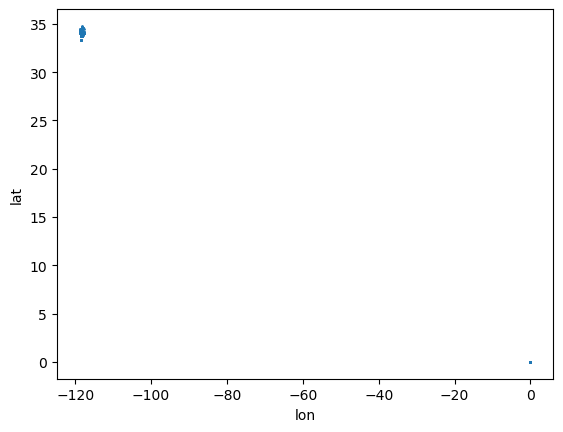

In [51]:
# We can see that some of our lat/lon data is set to 0,0 (not Los Angeles)
df[['lon', 'lat']].plot(kind='scatter', x='lon', y='lat', s=1)

In [52]:
# See how many records are like this
print(f'{len(df[df["lat"]==0]):,} of {len(df):,} records have no coordinate data ({100*(len(df[df["lat"]==0])/len(df)):.3f}%)')

# Trying to understand this issue better, we'll find these records from a dataset before we removed columns
df_2020[df_2020['LAT']==0].head()

# First observation is that there's nothing about these records that explains why there is no latitude or longitude data.
# One way we could fill those values is to attempt to use a python package like geopy to look up the coordinates of valid street addresses
    # https://github.com/geopy/geopy?tab=readme-ov-file#geocoding
# Another option is to replace these values with the geometric center of the reported district (area) as a best estimate.
# Considering this is only about 0.1% of our total data, and we have time constraints, the juice is not worth the squeeze. We'll delete them.

3,170 of 3,093,657 records have no coordinate data (0.102%)


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
558,211410751,04/30/2021 12:00:00 AM,06/12/2020 12:00:00 AM,930,14,Pacific,1438,2,354,THEFT OF IDENTITY,1501,30,F,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,3700 VETERAN AV,NaN,0.0,0.0
2265,200416028,12/17/2020 12:00:00 AM,12/17/2020 12:00:00 AM,1525,4,Hollenbeck,473,2,900,VIOLATION OF COURT ORDER,2038 0913 0361,65,M,H,504.0,OTHER RESIDENCE,NaN,NaN,IC,Invest Cont,900.0,NaN,NaN,NaN,2400 E 7TH ST,NaN,0.0,0.0
2630,201517780,11/20/2020 12:00:00 AM,11/20/2020 12:00:00 AM,1849,15,N Hollywood,1555,1,648,ARSON,NaN,0,X,X,101.0,STREET,NaN,NaN,IC,Invest Cont,648.0,NaN,NaN,NaN,LANKERSHIM,VINELAND,0.0,0.0
2914,200817064,12/01/2020 12:00:00 AM,12/01/2020 12:00:00 AM,1340,8,West LA,882,1,440,THEFT PLAIN - PETTY ($950 & UNDER),1822 2004 0345 0344 1402,0,X,X,101.0,STREET,NaN,NaN,IC,Invest Cont,440.0,998.0,NaN,NaN,OLYMPIC BL,BELOIT,0.0,0.0
3088,201410528,05/06/2020 12:00:00 AM,05/06/2020 12:00:00 AM,740,14,Pacific,1494,2,888,TRESPASSING,1501 2004,0,X,X,212.0,TRANSPORTATION FACILITY (AIRPORT),NaN,NaN,IC,Invest Cont,888.0,NaN,NaN,NaN,300 WORLD WY,NaN,0.0,0.0


In [53]:
# Remove records where lat or lon are zero
df = df[(df['lat']!=0)|(df['lon']!=0)]

# Verify our work
print(f"{len(df[(df['lat']==0)|(df['lon']==0)])} records remain with lat/lon of zero")

0 records remain with lat/lon of zero


In [58]:
print(sorted(df['victimDescent'].unique()))

# Descent Code:
# A - Other Asian
# B - Black
# C - Chinese
# D - Cambodian
# F - Filipino
# G - Guamanian
# H - Hispanic/Latin/Mexican
# I - American Indian/Alaskan Native
# J - Japanese
# K - Korean
# L - Laotian
# O - Other
# P - Pacific Islander
# S - Samoan
# U - Hawaiian
# V - Vietnamese
# W - White
# X - Unknown
# Z - Asian Indian

descent_dict = {
    'a': 'asian',
    'b': 'black',
    'c': 'asian',
    'd': 'asian',
    'f': 'pacific islander',
    'g': 'pacific islander',
    'h': 'hispanic',
    'i': 'native',
    'j': 'asian',
    'k': 'asian',
    'l': 'asian',
    'o': 'other',
    'p': 'pacific islander',
    's': 'pacific islander',
    'u': 'pacific islander',
    'v': 'asian',
    'w': 'white',
    'x': 'unknown',
    'z': 'asian',
    '-': 'unknown'
}


['-', 'a', 'b', 'c', 'd', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'o', 'p', 's', 'u', 'v', 'w', 'x', 'z']


# Category reduction and encoding

In [59]:
# Put victimAge into the main categories of minor, adult, senior, or unknown
def categorize_age(age):
    if age <= 0:
        return 'unknown'
    elif 1 <= age <= 17:
        return 'minor'
    elif 18 <= age <= 59:
        return 'adult'
    elif age >= 60:
        return 'senior'

df['victimAgeCategory'] = df['victimAge'].apply(categorize_age)

# victimSex had a very small amount of unexplained values
df['victimSex'] = df['victimSex'].apply(lambda age: 'x' if age not in ['m', 'f'] else age)

# Reduce victimDescent to fewer categories
df['victimDescentCategory'] = df['victimDescent'].map(descent_dict)

df


,reportDate,crimeDate,crimeTime,crimeDateTime,area,areaName,crimeCode,crimeCodeDescription,moCodes,victimAge,victimSex,victimDescent,siteCode,siteDescription,weaponCode,weaponDescription,status,statusDescription,crimeCode1,crimeCode2,crimeCode3,crimeCode4,lat,lon,victimAgeCategory,victimDescentCategory
0,2010-02-20,02/20/2010,1350,2010-02-20 13:50:00,13,newton,900,violation of court order,0913 1814 2000,48,m,h,501,single family dwelling,0,unknown/none,aa,adult arrest,900,0,0,0,33.9825,-118.2695,adult,hispanic
1,2010-09-13,09/12/2010,0045,2010-09-12 00:45:00,14,pacific,740,"vandalism - felony ($400 & over, all church va...",0329,0,m,w,101,street,0,unknown/none,ic,invest cont,740,0,0,0,33.9599,-118.3962,unknown,white
2,2010-08-09,08/09/2010,1515,2010-08-09 15:15:00,13,newton,946,other miscellaneous crime,0344,0,m,h,103,alley,0,unknown/none,ic,invest cont,946,0,0,0,34.0224,-118.2524,unknown,hispanic
3,2010-01-05,01/05/2010,0150,2010-01-05 01:50:00,6,hollywood,900,violation of court order,1100 0400 1402,47,f,w,101,street,102,hand gun,ic,invest cont,900,998,0,0,34.1016,-118.3295,adult,white
4,2010-01-03,01/02/2010,2100,2010-01-02 21:00:00,1,central,122,"rape, attempted",0400,47,f,h,103,alley,400,"strong-arm (hands, fist, feet or bodily force)",ic,invest cont,122,0,0,0,34.0387,-118.2488,adult,hispanic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970755,2024-07-24,07/23/2024,1400,2024-07-23 14:00:00,7,wilshire,510,vehicle - stolen,0,0,x,x,101,street,0,unknown/none,ic,invest cont,510,0,0,0,34.0362,-118.3284,unknown,unknown
970756,2024-01-15,01/15/2024,0100,2024-01-15 01:00:00,1,central,745,vandalism - misdeameanor ($399 or under),0329 0400 0416,0,x,x,503,hotel,500,unknown weapon/other weapon,ic,invest cont,745,0,0,0,34.0685,-118.2460,unknown,unknown
970757,2024-07-19,07/19/2024,0757,2024-07-19 07:57:00,17,devonshire,888,trespassing,1501,0,x,x,885,mta - orange line - chatsworth,0,unknown/none,ic,invest cont,888,0,0,0,34.2500,-118.5990,unknown,unknown
970758,2024-04-24,04/24/2024,1500,2024-04-24 15:00:00,3,southwest,230,"assault with deadly weapon, aggravated assault",1822 0334 0416 0445 0449 1202,70,f,w,102,sidewalk,308,stick,ic,invest cont,230,0,0,0,34.0215,-118.2868,senior,white


In [12]:
# Concept of categorizing and encoding categories

# Come up with a list of categories that they should fall into
# For each category, come up with a list of keywords that can easily identify things that match that category
# Use the apply.(lambda) format below to create an encoded column for that category (1 or 0)
# Remember that it's okay for one thing to fall into multiple categories, if it makes sense
# For example I might have a category for violent crime, domestic crime, and crimes involving children, and a domestic child abuse report would be in all 3 categories.

# Example
# Keyword list (theft)
theft_keywords = ['robbery', 'shoplift', 'theft', 'burglary', 'stolen', 'pickpocket', 'extortion', 'bunco', 'till tap', 'snatching']

# A binary value column to indicate that the crime falls into the theft category
df['crimeTheft'] = df['crimeCodeDescription'].apply(lambda x: 1 if any([word in x for word in theft_keywords]) else 0)

# Keyword list (involving children)
children_keywords = ['minor', 'child', 'chld']

# A binary value column to indicate that the crime falls into the children-involved category
df['crimeChild'] = df['crimeCodeDescription'].apply(lambda row: 1 if any([word in row for word in children_keywords]) else 0)

# A sample of data showing this working as intended
df.sample(20, random_state=0)[['crimeCodeDescription', 'crimeTheft', 'crimeChild']]

,crimeCodeDescription,crimeTheft,crimeChild
141180,human trafficking - commercial sex acts,0,0
961253,attempted robbery,1,0
1673756,theft plain - petty ($950 & under),1,0
962411,other miscellaneous crime,0,0
897023,burglary,1,0
1370893,child abuse (physical) - simple assault,0,1
424737,burglary,1,0
442962,theft of identity,1,0
896090,vehicle - stolen,1,0
856008,child neglect (see 300 w.i.c.),0,1


In [12]:
# Create CSV of crime codes (not comprehensive for all descriptions)
crimeCodes_df = pd.DataFrame({'code': df['crimeCode'].unique(), 'description': df['crimeCodeDescription'].unique()})
#crimeCodes_df.to_csv('crimeCodes_csv.csv', index=False)

In [13]:
# Use the crime code DF to find the corresponding descriptions for crime codes found in crimeCode1, 2, 3, and 4
df['crime1'] = df['crimeCode1'].map(crimeCodes_df.set_index('code')['description'].to_dict())
df['crime2'] = df['crimeCode2'].map(crimeCodes_df.set_index('code')['description'].to_dict())
df['crime3'] = df['crimeCode3'].map(crimeCodes_df.set_index('code')['description'].to_dict())
df['crime4'] = df['crimeCode4'].map(crimeCodes_df.set_index('code')['description'].to_dict())

# Fill nulls with an empty string
df[['crime1', 'crime2', 'crime3', 'crime4']] = df[['crime1', 'crime2', 'crime3', 'crime4']].fillna('')

In [43]:
def categorize_crime(df:pd.DataFrame, crime_columns=['crimeCodeDescription', 'crime1', 'crime2', 'crime3', 'crime4']):
    # Keywords for categorizing crimes
    theft_kws = ['robbery', 'shoplift', 'theft', 'burglary', 'stolen', 'pickpocket', 'extortion', 'bunco', 'till tap', 'snatching']
    violence_kws = ['assault', 'battery', 'brandish', 'rape', 'shots', 'homicide', 'penetration', 'sodomy', 'lynch', 'manslaughter', 'throwing object']
    sexual_kws = ['rape', 'sodomy', 'penetration', 'lewd', 'sexual', 'indecent', 'copulation', 'peeping', 'pornography', 'pimping', 'prowler', 'beastiality', 'bigamy', 'stalking', 'sex']
    damage_kws = ['vandalism', 'arson', 'thrown', 'wrecking', 'damage']
    child_kws = ['minor', 'child', 'chld']
    fraud_kws = ['fraud', 'counterfeit', 'bribery', 'false', 'forge', 'bunco']
    weapon_kws = ['weapon', 'firearm', 'armed']
    violation_kws = ['violation', 'contempt', 'failure', 'resisting arrest', 'out of compliance', 'unauthorized', 'pandering', 'blocking', 'disturbing', 'disrupt', 'contributing', 'illegal dumping', 'trespass']
    kidnap_kws = ['kidnap', 'false imprison', 'human traffic']

    # Join all crime columns into a single string column
    df['crime_text'] = df[crime_columns].fillna('').agg(' '.join, axis=1)
    
    # Using str.contains for vectorized operations
    df['nature_theft'] = df['crime_text'].str.contains('|'.join(theft_kws), case=False).astype(int)
    df['nature_violence'] = df['crime_text'].str.contains('|'.join(violence_kws), case=False).astype(int)
    df['nature_sexual'] = df['crime_text'].str.contains('|'.join(sexual_kws), case=False).astype(int)
    df['nature_damage'] = df['crime_text'].str.contains('|'.join(damage_kws), case=False).astype(int)
    df['nature_child'] = df['crime_text'].str.contains('|'.join(child_kws), case=False).astype(int)
    df['nature_fraud'] = df['crime_text'].str.contains('|'.join(fraud_kws), case=False).astype(int)
    df['nature_weapon'] = df['crime_text'].str.contains('|'.join(weapon_kws), case=False).astype(int)
    df['nature_violation'] = df['crime_text'].str.contains('|'.join(violation_kws), case=False).astype(int)
    df['nature_kidnap'] = df['crime_text'].str.contains('|'.join(kidnap_kws), case=False).astype(int)
    
    # Drop the intermediate column
    df.drop(columns=['crime_text'], inplace=True)
    
    return df

def categorize_site(df, site_column='siteDescription'):
    site_public_areas = ['street','parking lot','sidewalk','parking underground/building','park/playground','alley','gas station',
                        'transportation facility (airport)','public storage','police facility','bus stop',
                        'church/chapel (changed 03-03 from church/temple)','laundromat','shopping mall (common area)','construction site',
                        'government facility (federal,state, county & city)','storage shed','library','automated teller machine (atm)',
                        'beach','missions/shelters','la union station (not line specific)','mail box','check cashing*','the grove','car wash',
                        'patio*','theatre/movie','freeway','transient encampment','the beverly connection','vacant lot','post office',
                        'public restroom(indoors-inside)','convention center','bus stop/layover (also query 124)','slips/dock/marina/boat',
                        'swap meet','synagogue/temple','recycling center','cleaner/laundromat','public restroom/outside*',
                        'delivery service (fed ex, ups, couriers,courier service)*','stairwell*','fire station','elevator','staples center *',
                        'tv/radio/appliance','museum','pool-public/outdoor or indoor*','drive thru*','pedestrian overcrossing','underpass/bridge*',
                        'bowling alley*','cemetary*','river bed*',"vehicle storage lot (cars, trucks, rv's, boats, trailers, etc.)",'valet',
                        'telecommunication facility/location','other place of worship','savings & loan','mosque*','tool shed*','tunnel',
                        'catering/ice cream truck','amusement park*','mass gathering location','dam/reservoir','trash can/trash dumpster',
                        'pay phone','cultural significance/monument', 'drive thru banking (window)*','redline subway platform','abatement location',
                        'redline entrance/exit','escalator*','muscle beach','bank drop box/money drop-outside of bank*','sewage facility/pipe',
                        'harbor frwy station (not line specific)','orange line parking lot','redline subway tunnel','other/outside']
    site_store_restaurant = ['department store','restaurant/fast food','market','drug store','mini-mart','clothing store','bank',
                            'liquor store','cell phone store',"diy center (lowe's,home depot,osh,contractors warehouse)",
                            "coffee shop (starbucks, coffee bean, peet's, etc.)",'auto repair shop','discount store (99 cent,dollar,etc.',
                            'beauty/barber shop','bar/sports bar (open day & night)','hardware/building supply','membership store (costco,sams club)*',
                            'jewelry store','auto supply store*','medical marijuana facilities/businesses','beauty supply store','tobacco shop',
                            'pharmacy inside store or supermarket*','nail salon','the beverly center','auto dealership (chevy, ford, bmw, mercedes, etc.)',
                            'electronics store (ie:radio shack, etc.)','gun/sporting goods','massage parlor','nursery/flower shop','pet store',
                            'computer services/repairs/sales','pawn shop','furniture store','equipment rental','tattoo parlor*','credit union',
                            'optical office inside store or supermarket*','arcade,game room/video games (example chuckie cheese)*','book store',
                            'mortuary','record-cd music/computer game store','video rental store','banking inside market-store *','surplus survival store',
                            'other store']
    site_public_transport =['mta','taxi','municipal bus line includes ladot/dash','7th and metro center (not line specific)','aircraft',
                            'train tracks','metrolink train','greyhound or interstate bus','other rr train (union pac, sante fe etc','amtrak train',
                            'other interstate, charter bus','redline (subway train)','blue line (above ground surface train)',
                            'redline subway rail car (inside train)','tram/streetcar(boxlike wag on rails)*','redline subway mezzanine',
                            'green line (i-105 fwy level train)']
    site_private_transport = ['vehicle, passenger/truck',"mobile home/trailers/construction trailers/rv's/motorhome",'bus-charter/private',
                            'truck, commerical']
    site_private_home = ['single family dwelling','multi-unit dwelling (apartment, duplex, etc)','condominium/townhouse','nursing/convalescent/retirement home',
                        'group home','project/tenement/public housing','apartment/condo common laundry room',"single residence occupancy (sro's) locations",
                        'balcony*','foster home boys or girls*','basketball courts']
    site_athletic = ['dodger stadium','golf course*','coliseum','sports venue, other','sports arena','skateboard facility/skateboard park*','skating rink*',
                    'hockey rink/ice hockey','horse racing/santa anita park*','handball courts']
    site_school_hospital = ['high school','junior high school','elementary school','hospital','college/junior college/university',
                            'specialty school/other','private school/preschool','frat house/sorority/dormitory','bus, school, church',
                            'trade school (medical-technical-business)*', 'day care/children*','day care/adults*','vision care facility*',
                            'medical/dental offices','veterinarian/animal hospital','hospice','abortion clinic/abortion facility*']
    site_private_property = ['driveway','garage/carport','yard (residential/business)','other residence','hotel','office building/office',
                            'porch, residential','motel','health spa/gym','night club (open evenings only)','bar/cocktail/nightclub',
                            'warehouse','abandoned building abandoned house','auto sales lot','transitional housing/halfway house',
                            'studio (film/photographic/music)','tow yard*','manufacturing company','entertainment/comedy club (other)',
                            "sex oriented/book store/strip club/gentleman's club",'day care/adults*','high-rise building','short-term vacation rental',
                            'finance company','garment manufacturer','energy plant/facility','water facility','oil refinery','methadone clinic',
                            'chemical storage/manufacturing plant','dept of defense facility','nuclear facility','detention/jail facility','other premise','other business']
    site_online = ['cyberspace','website']

    # creating columns
    df['sitePublicArea'] = df['siteDescription'].apply(lambda x: 1 if any([word in x for word in site_public_areas]) else 0)
    df['siteStoreRestaurant'] = df['siteDescription'].apply(lambda x: 1 if any([word in x for word in site_store_restaurant]) else 0)
    df['sitePublicTransport'] = df['siteDescription'].apply(lambda x: 1 if any([word in x for word in site_public_transport]) else 0)
    df['sitePrivateTransport'] = df['siteDescription'].apply(lambda x: 1 if any([word in x for word in site_private_transport]) else 0)
    df['sitePrivateHome'] = df['siteDescription'].apply(lambda x: 1 if any([word in x for word in site_private_home]) else 0)
    df['siteAthletic'] = df['siteDescription'].apply(lambda x: 1 if any([word in x for word in site_athletic]) else 0)
    df['siteSchoolHospital'] = df['siteDescription'].apply(lambda x: 1 if any([word in x for word in site_school_hospital]) else 0)
    df['sitePrivateProperty'] = df['siteDescription'].apply(lambda x: 1 if any([word in x for word in site_private_property]) else 0)
    df['siteOnline'] = df['siteDescription'].apply(lambda x: 1 if any([word in x for word in site_online]) else 0)

    return df

def categorization_weapon(df:pd.DataFrame, weapon_Column='weaponDescription'):
    # Key word for Weapon Description used in the crime
    human_powered = ['strong-arm (hands, fist, feet or bodily force)', 'knife with blade 6inches or less', 'other knife', 'bottle', 'rock/thrown object', 'stick', 'folding knife', 'club/bat', 'kitchen knife', 'blunt instrument', 'knife with blade over 6inches in', 'pipe/metal pipe', 'belt flailing instrument/chain', 'other cutting instrument', 'hammer', 'physical presence', 'screwdriver', 'unknown type cutting instrument', 'machete', 'scissors', 'concrete block/brick', 'fixed object', 'board', 'switch blade', 'glass', 'axe', 'brass knuckles', 'tire iron', 'scalding liquid', 'razor blade', 'sword', 'razor', 'ice pick', 'dirk/dagger', 'rope/ligature', 'cleaver', 'bowie knife', 'dog/animal(sic animal on)', 'straight razor', 'black jack', 'bow and arrow', 'martial arts weapons' ]
    gun = ['hand gun','semi-automatic pistol','unknown firearm', 'revolver', 'simulated gun', 'air pistol/revolver/rifle/bb gun', 'other firearm', 'shotgun', 'rifle', 'toy gun', 'assault weapon/uzi/ak47/etc', 'heckler & koch 93 semiautomatic assault rifle', 'automatic weapon/sub-machine gun', 'sawed off rifle/shotgun', 'semi-automatic rifle', 'starter pistol/revolver', 'unk type semiautomatic assault rifle', 'uzi semiautomatic assault rifle', 'relic firearm', 'antique firearm', 'heckler & Koch 91 semiautomatic assault rifle', 'mac-10 semiautomatic assault weapon', 'mac-11 semiautomatic assault weapon', 'm1-1 semiautomatic assault weapon', 'm-14 semiautomatic assault weapon']
    machine = ['vehicle']
    no_weapon = ['unknown weapon/other weapon']
    verbal_writtien_threat=['verbal threat', 'demand note', 'bomb threat']
    chemical = ['mace/pepper spray','fire''caustic chemical/poison', 'explosive device', 'liquor/drugs', 'syringe']

    df['weaponHuman'] = df[weapon_Column].apply(lambda x: 1 if any([word in x for word in human_powered]) else 0)
    df['weaponGun'] = df[weapon_Column].apply(lambda x: 1 if any([word in x for word in gun]) else 0)
    df['weaponMachine'] = df[weapon_Column].apply(lambda x: 1 if any([word in x for word in machine]) else 0)
    df['weaponNone'] = df[weapon_Column].apply(lambda x: 1 if any([word in x for word in no_weapon]) else 0)
    df['weaponVerbal'] = df[weapon_Column].apply(lambda x: 1 if any([word in x for word in verbal_writtien_threat]) else 0)
    df['verbalChemical'] = df[weapon_Column].apply(lambda x: 1 if any([word in x for word in chemical]) else 0)

    return df


# Feature engineering

In [62]:
df['reportDelay'] = (df['reportDate'] - df['crimeDateTime']).dt.days
df['reportTimely'] = df['reportDelay'].apply(lambda days: 1 if days < 2 else 0)
df

,reportDate,crimeDate,crimeTime,crimeDateTime,area,areaName,crimeCode,crimeCodeDescription,moCodes,victimAge,victimSex,victimDescent,siteCode,siteDescription,weaponCode,weaponDescription,status,statusDescription,crimeCode1,crimeCode2,crimeCode3,crimeCode4,lat,lon,victimAgeCategory,victimDescentCategory,reportDelay,reportTimely
0,2010-02-20,02/20/2010,1350,2010-02-20 13:50:00,13,newton,900,violation of court order,0913 1814 2000,48,m,h,501,single family dwelling,0,unknown/none,aa,adult arrest,900,0,0,0,33.9825,-118.2695,adult,hispanic,-1,1
1,2010-09-13,09/12/2010,0045,2010-09-12 00:45:00,14,pacific,740,"vandalism - felony ($400 & over, all church va...",0329,0,m,w,101,street,0,unknown/none,ic,invest cont,740,0,0,0,33.9599,-118.3962,unknown,white,0,1
2,2010-08-09,08/09/2010,1515,2010-08-09 15:15:00,13,newton,946,other miscellaneous crime,0344,0,m,h,103,alley,0,unknown/none,ic,invest cont,946,0,0,0,34.0224,-118.2524,unknown,hispanic,-1,1
3,2010-01-05,01/05/2010,0150,2010-01-05 01:50:00,6,hollywood,900,violation of court order,1100 0400 1402,47,f,w,101,street,102,hand gun,ic,invest cont,900,998,0,0,34.1016,-118.3295,adult,white,-1,1
4,2010-01-03,01/02/2010,2100,2010-01-02 21:00:00,1,central,122,"rape, attempted",0400,47,f,h,103,alley,400,"strong-arm (hands, fist, feet or bodily force)",ic,invest cont,122,0,0,0,34.0387,-118.2488,adult,hispanic,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970755,2024-07-24,07/23/2024,1400,2024-07-23 14:00:00,7,wilshire,510,vehicle - stolen,0,0,x,x,101,street,0,unknown/none,ic,invest cont,510,0,0,0,34.0362,-118.3284,unknown,unknown,0,1
970756,2024-01-15,01/15/2024,0100,2024-01-15 01:00:00,1,central,745,vandalism - misdeameanor ($399 or under),0329 0400 0416,0,x,x,503,hotel,500,unknown weapon/other weapon,ic,invest cont,745,0,0,0,34.0685,-118.2460,unknown,unknown,-1,1
970757,2024-07-19,07/19/2024,0757,2024-07-19 07:57:00,17,devonshire,888,trespassing,1501,0,x,x,885,mta - orange line - chatsworth,0,unknown/none,ic,invest cont,888,0,0,0,34.2500,-118.5990,unknown,unknown,-1,1
970758,2024-04-24,04/24/2024,1500,2024-04-24 15:00:00,3,southwest,230,"assault with deadly weapon, aggravated assault",1822 0334 0416 0445 0449 1202,70,f,w,102,sidewalk,308,stick,ic,invest cont,230,0,0,0,34.0215,-118.2868,senior,white,-1,1


In [75]:
import geopandas as gpd

shapefile_path = 'shapes/Median_Income_and_AMI_(census_tract).shp'
gdf_shapefile = gpd.read_file(shapefile_path).to_crs(epsg=4326)

In [76]:
gdf_shapefile = gdf_shapefile[['med_hh_inc','med_hh_i_1','ami_catego','geometry']]
gdf_shapefile['']

,med_hh_inc,med_hh_i_1,ami_catego,geometry
0,38892.0,1204,Very Low Income,"POLYGON ((-118.22671 34.06241, -118.22451 34.0..."
1,41027.0,903,Very Low Income,"POLYGON ((-118.21558 34.07185, -118.21168 34.0..."
2,42500.0,612,Very Low Income,"POLYGON ((-118.21562 34.07364, -118.21307 34.0..."
3,37232.0,845,Very Low Income,"POLYGON ((-118.21527 34.06348, -118.21545 34.0..."
4,65000.0,782,Low Income,"POLYGON ((-118.18181 34.09277, -118.18038 34.0..."
...,...,...,...,...
2490,126450.0,1215,Above Moderate Income,"POLYGON ((-118.07224 33.85451, -118.07046 33.8..."
2491,107672.0,1352,Above Moderate Income,"POLYGON ((-118.06373 33.86586, -118.05350 33.8..."
2492,104439.0,1558,Above Moderate Income,"POLYGON ((-118.04645 33.87325, -118.03775 33.8..."
2493,131012.0,1216,Above Moderate Income,"POLYGON ((-118.06361 33.85858, -118.05494 33.8..."


In [77]:
crime_gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df['lon'], df['lat']),
    crs='EPSG:4326')

crime_gdf

,reportDate,crimeDate,crimeTime,crimeDateTime,area,areaName,crimeCode,crimeCodeDescription,moCodes,victimAge,victimSex,victimDescent,siteCode,siteDescription,weaponCode,weaponDescription,status,statusDescription,crimeCode1,crimeCode2,crimeCode3,crimeCode4,lat,lon,victimAgeCategory,victimDescentCategory,reportDelay,reportTimely,geometry
0,2010-02-20,02/20/2010,1350,2010-02-20 13:50:00,13,newton,900,violation of court order,0913 1814 2000,48,m,h,501,single family dwelling,0,unknown/none,aa,adult arrest,900,0,0,0,33.9825,-118.2695,adult,hispanic,-1,1,POINT (-118.26950 33.98250)
1,2010-09-13,09/12/2010,0045,2010-09-12 00:45:00,14,pacific,740,"vandalism - felony ($400 & over, all church va...",0329,0,m,w,101,street,0,unknown/none,ic,invest cont,740,0,0,0,33.9599,-118.3962,unknown,white,0,1,POINT (-118.39620 33.95990)
2,2010-08-09,08/09/2010,1515,2010-08-09 15:15:00,13,newton,946,other miscellaneous crime,0344,0,m,h,103,alley,0,unknown/none,ic,invest cont,946,0,0,0,34.0224,-118.2524,unknown,hispanic,-1,1,POINT (-118.25240 34.02240)
3,2010-01-05,01/05/2010,0150,2010-01-05 01:50:00,6,hollywood,900,violation of court order,1100 0400 1402,47,f,w,101,street,102,hand gun,ic,invest cont,900,998,0,0,34.1016,-118.3295,adult,white,-1,1,POINT (-118.32950 34.10160)
4,2010-01-03,01/02/2010,2100,2010-01-02 21:00:00,1,central,122,"rape, attempted",0400,47,f,h,103,alley,400,"strong-arm (hands, fist, feet or bodily force)",ic,invest cont,122,0,0,0,34.0387,-118.2488,adult,hispanic,0,1,POINT (-118.24880 34.03870)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970755,2024-07-24,07/23/2024,1400,2024-07-23 14:00:00,7,wilshire,510,vehicle - stolen,0,0,x,x,101,street,0,unknown/none,ic,invest cont,510,0,0,0,34.0362,-118.3284,unknown,unknown,0,1,POINT (-118.32840 34.03620)
970756,2024-01-15,01/15/2024,0100,2024-01-15 01:00:00,1,central,745,vandalism - misdeameanor ($399 or under),0329 0400 0416,0,x,x,503,hotel,500,unknown weapon/other weapon,ic,invest cont,745,0,0,0,34.0685,-118.2460,unknown,unknown,-1,1,POINT (-118.24600 34.06850)
970757,2024-07-19,07/19/2024,0757,2024-07-19 07:57:00,17,devonshire,888,trespassing,1501,0,x,x,885,mta - orange line - chatsworth,0,unknown/none,ic,invest cont,888,0,0,0,34.2500,-118.5990,unknown,unknown,-1,1,POINT (-118.59900 34.25000)
970758,2024-04-24,04/24/2024,1500,2024-04-24 15:00:00,3,southwest,230,"assault with deadly weapon, aggravated assault",1822 0334 0416 0445 0449 1202,70,f,w,102,sidewalk,308,stick,ic,invest cont,230,0,0,0,34.0215,-118.2868,senior,white,-1,1,POINT (-118.28680 34.02150)


In [78]:
merged = gpd.sjoin(crime_gdf, gdf_shapefile, how='left', predicate='within')
merged

c:\Users\Alex School\.conda\envs\myenv\Lib\site-packages\IPython\core\interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,reportDate,crimeDate,crimeTime,crimeDateTime,area,areaName,crimeCode,crimeCodeDescription,moCodes,victimAge,victimSex,victimDescent,siteCode,siteDescription,weaponCode,weaponDescription,status,statusDescription,crimeCode1,crimeCode2,crimeCode3,crimeCode4,lat,lon,victimAgeCategory,victimDescentCategory,reportDelay,reportTimely,geometry,index_right,med_hh_inc,med_hh_i_1,ami_catego
0,2010-02-20,02/20/2010,1350,2010-02-20 13:50:00,13,newton,900,violation of court order,0913 1814 2000,48,m,h,501,single family dwelling,0,unknown/none,aa,adult arrest,900,0,0,0,33.9825,-118.2695,adult,hispanic,-1,1,POINT (-118.26950 33.98250),1127.0,42332.0,1215.0,Very Low Income
1,2010-09-13,09/12/2010,0045,2010-09-12 00:45:00,14,pacific,740,"vandalism - felony ($400 & over, all church va...",0329,0,m,w,101,street,0,unknown/none,ic,invest cont,740,0,0,0,33.9599,-118.3962,unknown,white,0,1,POINT (-118.39620 33.95990),1698.0,140446.0,2657.0,Above Moderate Income
2,2010-08-09,08/09/2010,1515,2010-08-09 15:15:00,13,newton,946,other miscellaneous crime,0344,0,m,h,103,alley,0,unknown/none,ic,invest cont,946,0,0,0,34.0224,-118.2524,unknown,hispanic,-1,1,POINT (-118.25240 34.02240),779.0,44277.0,1106.0,Very Low Income
3,2010-01-05,01/05/2010,0150,2010-01-05 01:50:00,6,hollywood,900,violation of court order,1100 0400 1402,47,f,w,101,street,102,hand gun,ic,invest cont,900,998,0,0,34.1016,-118.3295,adult,white,-1,1,POINT (-118.32950 34.10160),2251.0,36183.0,929.0,Very Low Income
4,2010-01-03,01/02/2010,2100,2010-01-02 21:00:00,1,central,122,"rape, attempted",0400,47,f,h,103,alley,400,"strong-arm (hands, fist, feet or bodily force)",ic,invest cont,122,0,0,0,34.0387,-118.2488,adult,hispanic,0,1,POINT (-118.24880 34.03870),773.0,37147.0,1157.0,Very Low Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970755,2024-07-24,07/23/2024,1400,2024-07-23 14:00:00,7,wilshire,510,vehicle - stolen,0,0,x,x,101,street,0,unknown/none,ic,invest cont,510,0,0,0,34.0362,-118.3284,unknown,unknown,0,1,POINT (-118.32840 34.03620),596.0,58000.0,858.0,Very Low Income
970756,2024-01-15,01/15/2024,0100,2024-01-15 01:00:00,1,central,745,vandalism - misdeameanor ($399 or under),0329 0400 0416,0,x,x,503,hotel,500,unknown weapon/other weapon,ic,invest cont,745,0,0,0,34.0685,-118.2460,unknown,unknown,-1,1,POINT (-118.24600 34.06850),2400.0,52250.0,2141.0,Very Low Income
970757,2024-07-19,07/19/2024,0757,2024-07-19 07:57:00,17,devonshire,888,trespassing,1501,0,x,x,885,mta - orange line - chatsworth,0,unknown/none,ic,invest cont,888,0,0,0,34.2500,-118.5990,unknown,unknown,-1,1,POINT (-118.59900 34.25000),745.0,112222.0,1714.0,Above Moderate Income
970758,2024-04-24,04/24/2024,1500,2024-04-24 15:00:00,3,southwest,230,"assault with deadly weapon, aggravated assault",1822 0334 0416 0445 0449 1202,70,f,w,102,sidewalk,308,stick,ic,invest cont,230,0,0,0,34.0215,-118.2868,senior,white,-1,1,POINT (-118.28680 34.02150),761.0,NaN,108.0,None


In [82]:
merged['ami_catego'].isna().sum()

55047